In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score


In [89]:
with open('public_api_results/cohere.tsv', 'r') as f:
    ch_df = pd.read_csv(f, sep='\t')
with open('public_api_results/openai.tsv', 'r') as f:
    ai_df = pd.read_csv(f, sep='\t')

,model_name,prompt_len,output_len,call_latency,secs_per_tok
0,text-babbage-001,17.0,11.0,0.189056,0.017187
1,text-davinci-003,17.0,1.0,0.364798,0.364798
2,text-curie-001,17.0,8.8,0.218532,0.024876
3,davinci-instruct-beta,17.0,37.0,1.569439,0.043164
4,text-babbage-001,17.0,18.0,0.230573,0.012810
...,...,...,...,...,...
139,davinci-instruct-beta,555.0,87.6,2.996535,0.034529
140,text-babbage-001,555.0,41.4,0.410188,0.009885
141,text-davinci-003,555.0,100.0,3.007226,0.030072
142,text-curie-001,555.0,71.4,0.980684,0.014016


{'command-xlarge-nightly', 'text-davinci-003', 'davinci-instruct-beta', 'text-curie-001', 'command-medium-nightly', 'text-babbage-001'}
Model command-xlarge-nightly, r2=0.5755382521348713
Model text-davinci-003, r2=0.9674407519981991
Model davinci-instruct-beta, r2=0.7990182194110448
Model text-curie-001, r2=0.9420479865261038
Model command-medium-nightly, r2=0.38265638980811545
Model text-babbage-001, r2=0.8772831464598726


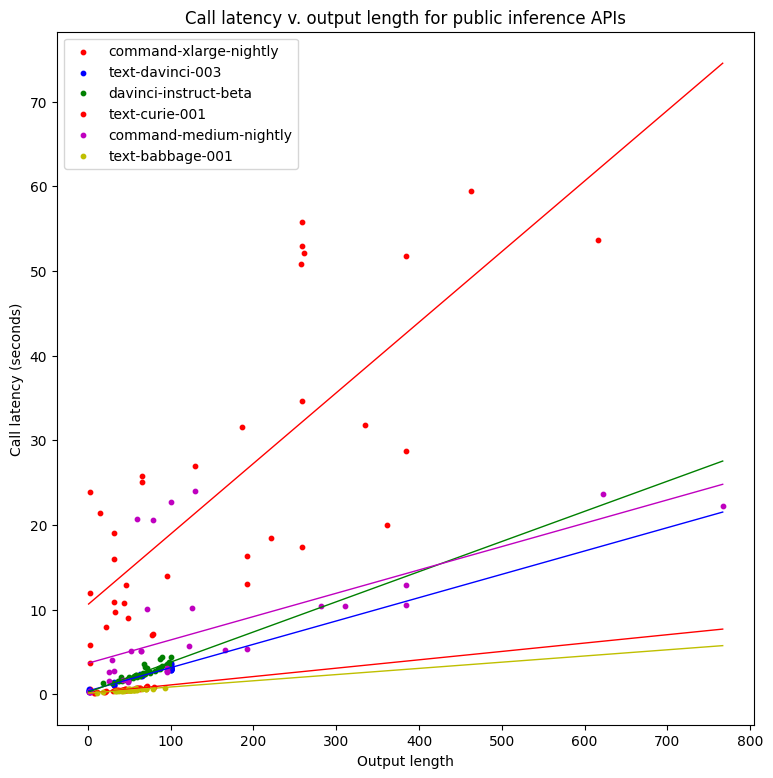

In [104]:
partition_col = 'prompt_len'
independent_col = 'output_len'

def save_figs(partition_col, independent_col, df):
    model_names = set(df['model_name'])
    prompt_lens = set(ch_df[partition_col])
    fig, ax = plt.subplots(figsize = (9, 9))
    plt.title(f"Call latency v. output length for public inference APIs")
    plt.xlabel("Output length")
    plt.ylabel("Call latency (seconds)")
    print(model_names)
    for (model, color) in zip(model_names, ['r', 'b', 'g', 'r',  'm', 'y']):
        subset = df[df.model_name == model]

        x, y = subset[independent_col], subset['call_latency']
        ax.scatter(x,y, color=color, label=model, s=10)

        b, a = np.polyfit(x, y, deg=1)
        predict = np.poly1d((b,a))
        r2 = r2_score(y, predict(x))
        print(f"Model {model}, r2={r2}")
        # Create sequence of 100 numbers from 0 to 100 
        xseq = np.linspace(min(df[independent_col]),max(df[independent_col]), num=100)

        # Plot regression line
        ax.plot(xseq, a + b * xseq, color=color, lw=1);
    plt.legend(loc="upper left")

            
    #             plt.savefig(f"public_api_results/cohere_{model}_{partition_col}={prompt_len:.0f}.png")
    #             plt.clf()

save_figs(partition_col, independent_col, pd.concat([ai_df, ch_df]))
# save_figs(independent_col, partition_col)


    